# Data analysis
In this section, we are going to implement and discuss the different data preprocessing algorithms.

This section has the following algorithms:
- PCA
- MDS
- ISOMAP

In [31]:
from sklearn.datasets import fetch_lfw_people
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, Isomap, LocallyLinearEmbedding

import matplotlib.pyplot as plt

import time

# Load data
lfw_people = fetch_lfw_people(min_faces_per_person=53, resize=.4)
X, y = lfw_people.images, lfw_people.target
X.shape, y.shape

((1456, 50, 37), (1456,))

In [32]:
TRAIN_SIZE = 0.7
RANDOM_STATE = 42

# Codificamos las etiquetas
labelEncoder = LabelEncoder()
y = labelEncoder.fit_transform(y)

# Dividimos los datos en train y test
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

print(f"x_train shape: {x_train.shape}")
print(f" x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f" y_test shape: {y_test.shape}")

x_train shape: (1019, 50, 37)
 x_test shape: (437, 50, 37)
y_train shape: (1019,)
 y_test shape: (437,)


## PCA
Implementation and discussion of the PCA algorithm

In [33]:
METHOD = PCA(n_components=2)

start_time = time.time()
x_train_reduced = METHOD.fit_transform(x_train.reshape(x_train.shape[0], -1))
x_test_reduced = METHOD.transform(x_test.reshape(x_test.shape[0], -1))
total_time = time.time() - start_time

PCA_REDUCED = ( x_train_reduced.copy(), x_test_reduced.copy(), "PCA" )
print(f"Total time elapsed: {total_time}")
print("")
print(f"Shapes:")
print(f"\tx_train:         {x_train.shape}")
print(f"\tx_train_reduced: {x_train_reduced.shape}")

Total time elapsed: 0.0941767692565918

Shapes:
	x_train:         (1019, 50, 37)
	x_train_reduced: (1019, 2)


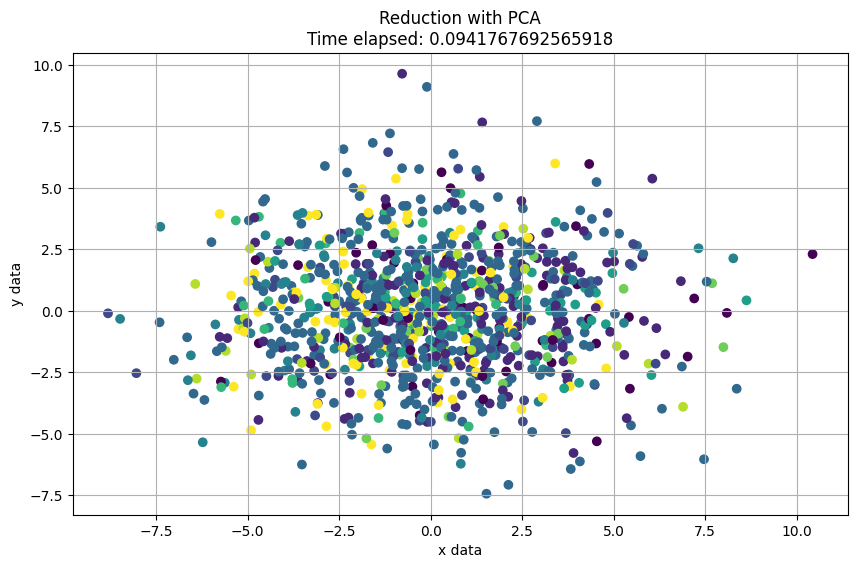

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(x_train_reduced[:,0], x_train_reduced[:,1], c=y_train, cmap='viridis', label="PCA")
plt.title(f"Reduction with PCA\nTime elapsed: {total_time}")
plt.xlabel("x data")
plt.ylabel("y data")
plt.grid(True)
plt.show()

## MDS
Implementation and discussion of the MDS algorithm

In [35]:
METHOD = MDS(n_components=2)

start_time = time.time()
x_train_reduced = METHOD.fit_transform( x_train.reshape(x_train.shape[0], -1) )
x_test_reduced = METHOD.fit_transform( x_test.reshape(x_test.shape[0], -1) )
total_time = time.time() - start_time
MDS_REDUCED = ( x_train_reduced.copy(), x_test_reduced.copy(), "MDS" )

print(f"Total time elapsed: {total_time}")
print("")
print(f"Shapes:")
print(f"\tx_train:         {x_train.shape}")
print(f"\tx_train_reduced: {x_train_reduced.shape}")

Total time elapsed: 65.97434854507446

Shapes:
	x_train:         (1019, 50, 37)
	x_train_reduced: (1019, 2)


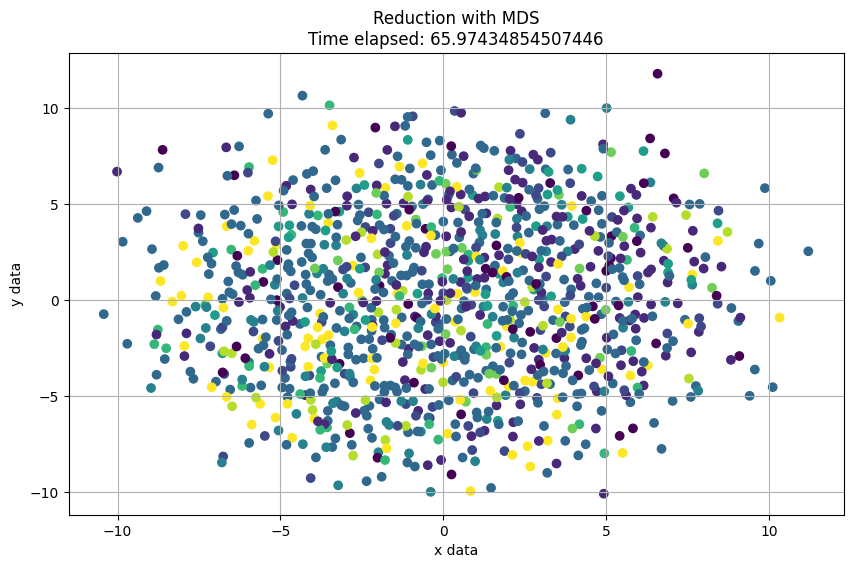

In [36]:
plt.figure(figsize=(10, 6))
plt.scatter(x_train_reduced[:,0], x_train_reduced[:,1], c=y_train, cmap='viridis')
plt.title(f"Reduction with MDS\nTime elapsed: {total_time}")
plt.xlabel("x data")
plt.ylabel("y data")
plt.grid(True)
plt.show()

## ISOMAP
Implementation and discussion of the ISOMAP algorithm

In [37]:
METHOD = Isomap(n_components=2)

start_time = time.time()
x_train_reduced = METHOD.fit_transform( x_train.reshape(x_train.shape[0], -1) )
x_test_reduced = METHOD.transform( x_test.reshape(x_test.shape[0], -1) )
total_time = time.time() - start_time
ISOMAP_REDUCED = ( x_train_reduced.copy(), x_test_reduced.copy(), "ISOMAP" )

print(f"Total time elapsed: {total_time}")
print("")
print(f"Shapes:")
print(f"\tx_train:         {x_train.shape}")
print(f"\tx_train_reduced: {x_train_reduced.shape}")

Total time elapsed: 0.6281585693359375

Shapes:
	x_train:         (1019, 50, 37)
	x_train_reduced: (1019, 2)


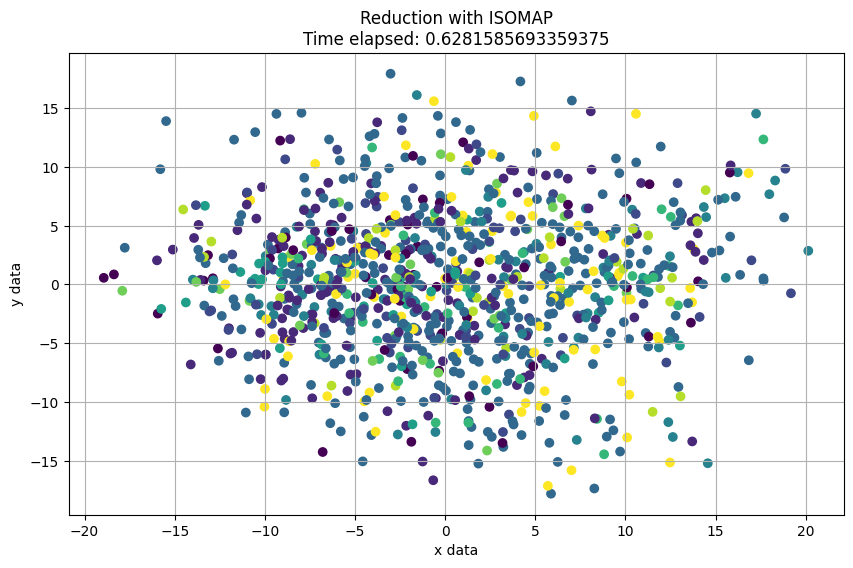

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(x_train_reduced[:,0], x_train_reduced[:,1], c=y_train, cmap='viridis')
plt.title(f"Reduction with ISOMAP\nTime elapsed: {total_time}")
plt.xlabel("x data")
plt.ylabel("y data")
plt.grid(True)
plt.show()

## Locally Linear Embedding
Implementation and discussion of the LLE algorithm

In [39]:
METHOD = LocallyLinearEmbedding(n_components=2)

start_time = time.time()
x_train_reduced = METHOD.fit_transform( x_train.reshape(x_train.shape[0], -1) )
x_test_reduced = METHOD.transform( x_test.reshape(x_test.shape[0], -1) )
total_time = time.time() - start_time
LLE_REDUCED = ( x_train_reduced.copy(), x_test_reduced.copy(), "LLE" )

print(f"Total time elapsed: {total_time}")
print("")
print(f"Shapes:")
print(f"\tx_train:         {x_train.shape}")
print(f"\tx_train_reduced: {x_train_reduced.shape}")

Total time elapsed: 0.4321787357330322

Shapes:
	x_train:         (1019, 50, 37)
	x_train_reduced: (1019, 2)


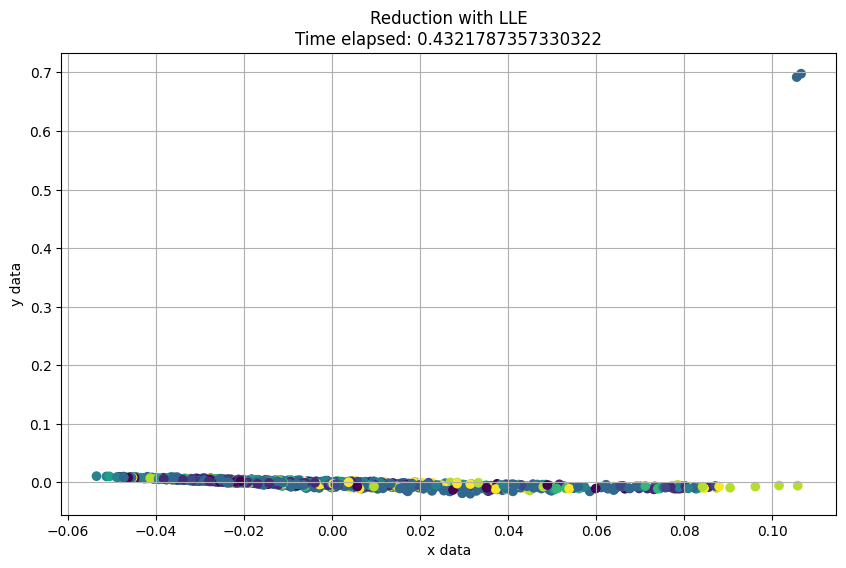

In [40]:
plt.figure(figsize=(10, 6))
plt.scatter(x_train_reduced[:,0], x_train_reduced[:,1], c=y_train, cmap='viridis')
plt.title(f"Reduction with LLE\nTime elapsed: {total_time}")
plt.xlabel("x data")
plt.ylabel("y data")
plt.grid(True)
plt.show()

## Summary

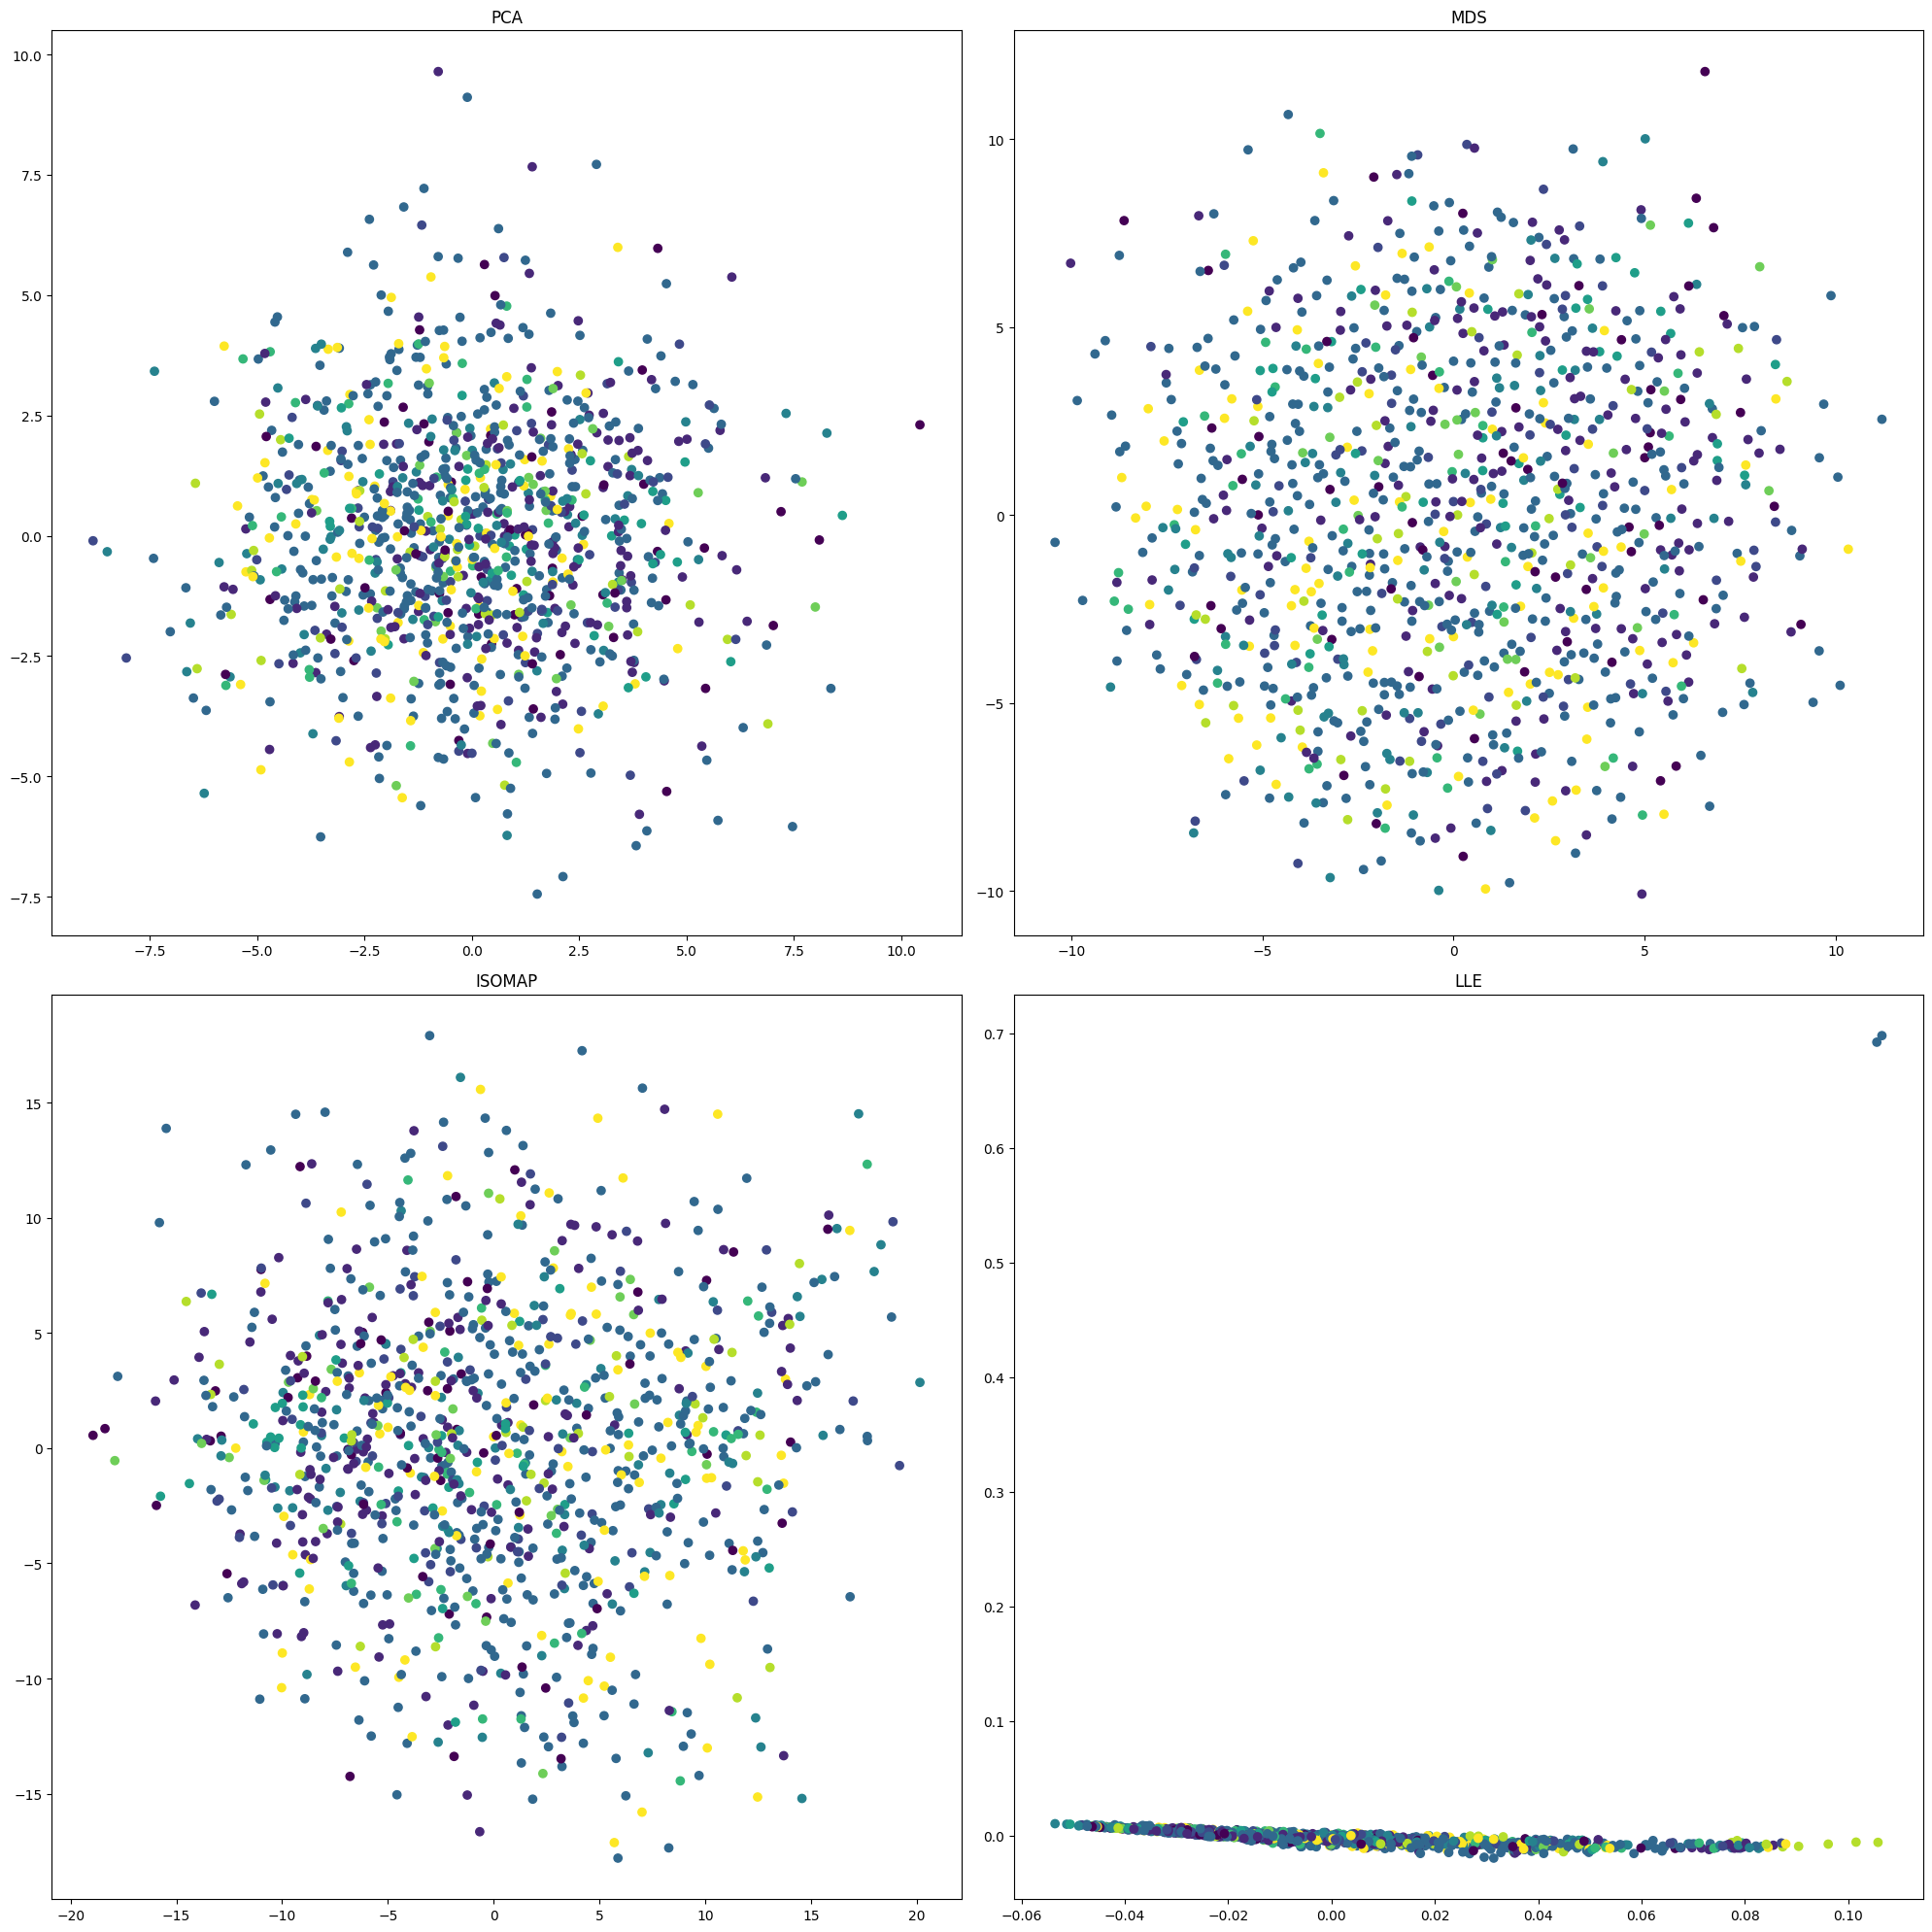

In [41]:
fig, ((axPCA, axMDS), (axISOMAP, axLLE)) = plt.subplots(2,2, figsize=(20, 20))

for axis, reduced in [(axPCA, PCA_REDUCED), (axMDS, MDS_REDUCED), (axISOMAP, ISOMAP_REDUCED), (axLLE, LLE_REDUCED)]:
    axis.scatter(reduced[0][:,0], reduced[0][:,1], c=y_train, cmap='viridis')
    axis.set_title(f"{reduced[2]}")

plt.tight_layout()
plt.show()